In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
from scipy.stats import spearmanr

# MEASURES OF CENTRAL TENDENCY

In [2]:
ds = np.sort(np.random.randint(1,20,16))

In [3]:
ds

array([ 1,  1,  4,  5,  7,  8, 10, 11, 11, 12, 13, 15, 15, 15, 16, 19])

11.5
10.1875
[ 1  1  4  5  7  8 10 11 11 12 13 15 15 15 16 19]
[15]
[10 11 12 25 25 27 31 33 34 34 35 36 43 50 59] 7
[10, 25, 33, 36, 59]
[19 22 23 25 26 28 29 32 34 37 39] 5
[19, 23, 28, 34, 39]


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

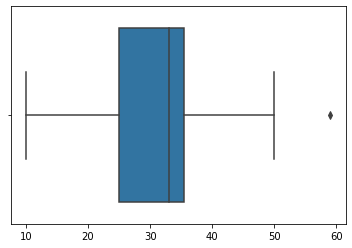

In [4]:


def mean(dat)->np.array:
    return sum(dat)/len(dat)

def median(dat):
    mid_point = int(len(dat)/2)
    if (len(dat)%2) == 0:
        return (dat[mid_point]+dat[mid_point+1])/2
    else:
        return (dat[mid_point])

def mode(dat):
    print (dat)
    val, count = np.unique(dat,return_counts=True)
    num_freq = dict(zip(val,count))
    values_list = np.array(list(num_freq.values()))
    max_val = np.max(values_list)
    mode = [val for val in num_freq.keys() if (num_freq[val]==values_list.max())]
    return mode

def IQR(dat):
    dat = np.sort(dat)
    mid_point = int(len(dat)/2)
    print (dat, mid_point)
    return [min(dat), median(dat[:mid_point]), median(dat), median(dat[mid_point+1:]), max(dat)]

def outlier_zscore(dat):
    zscore_list = stats.zscore(dat)
    outlier_dat =  zip(dat, zscore_list)
    return [key for key, val in outlier_dat if ((val>3) or (val<-3))]
    
print (median(ds))
print (mean(ds))
print (mode(ds))
print (IQR([10,11,12,25,25,27,31,33,34,34,35,36,43,50,59]))
print (IQR([19, 26, 25, 37, 32, 28, 22, 23, 29, 34, 39]))
sns.boxplot([10,11,12,25,25,27,31,33,34,34,35,36,43,50,59])

In [5]:
arr = np.random.randint(1,20,10)
print(arr)
#find maximum value
max_value = np.max(arr)
print('Maximum value of the array is',max_value)

[ 9  9  8  7 14 11 13 11 11  4]
Maximum value of the array is 14


# MEASURES OF SPREAD

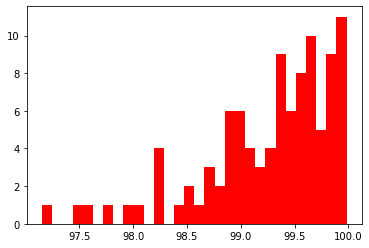

mean is 99.25822367369582  median is  99.68309799607692
-1.2232017543536375


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

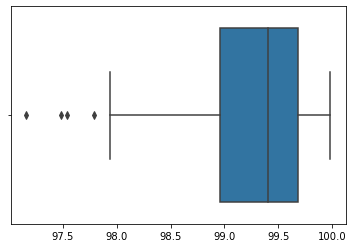

In [6]:
from scipy.stats import skewnorm, skew
import matplotlib.pyplot as plt

numValues = 100
maxValue = 100
skewness = -2000   #Negative values are left skewed, positive values are right skewed.
random_data = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)
# random_data = random - min(random)      #Shift the set so the minimum value is equal to zero.
# random_data = random / max(random)      #Standadize all the vlues between 0 and 1. 
# # random_data = random * maxValue  

plt.hist(random_data,30, color = 'red')
plt.show()
print ('mean is', mean(random_data),' median is ', median(random_data))
print (skew(random_data))
sns.boxplot(random_data)

# OUTLIER CHECK

mean is  31.0
[10 11 12 25 25 27 31 33 34 34 35 36 43 50 59] 7
[10, 25, 33, 36, 59] 52.5 8.5
[59]


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

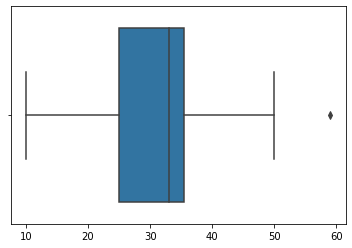

In [19]:
dataset = np.array([26,15,20.5,31,-350,31,30.5])
dataset = np.array([10,11,12,25,25,27,31,33,34,34,35,36,43,50,59])
print ('mean is ',dataset.mean())
IQR_data = IQR(dataset)
upper_threshold = IQR_data[3]+(1.5*(IQR_data[3]-IQR_data[1]))
lower_threshold = IQR_data[1]-(1.5*(IQR_data[3]-IQR_data[1]))
print (IQR_data,upper_threshold,lower_threshold)
outlier_data = [val for val in dataset if ((val>upper_threshold) or (val<lower_threshold)) ]
print (outlier_data)
sns.boxplot(dataset)

# FIND OUTLIER USING Z-SCORE METHOD

In [26]:
dataset = np.array([1,2,2,3,1,1,15,2,2,2,3,1,1,2])
zscore_data = outlier_zscore(dataset)
print (zscore_data)

[15]


# COVARIANCE AND CORRELATION

Between a and b : positive covariance  [[ 7.3   10.95 ]
 [10.95  16.425]]
Between a and b : positive correlation  SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)
Between b and c : negative covariance  [[ 16.425 -10.95 ]
 [-10.95    7.3  ]]
Between c and b : positive correlation  -0.9999999999999999
Between c and b : negative covariance  [[  7.3   -10.95 ]
 [-10.95   16.425]]
Between c and b : positive correlation  -0.9999999999999999
Between c and d : negative covariance  [[ 7.3   10.95 ]
 [10.95  16.425]]
Between c and d : positive correlation  0.9999999999999999
Between a and e : no covariance  [[ 7.3 -2. ]
 [-2.  51.5]]
Between a and e : no correlation  0.0


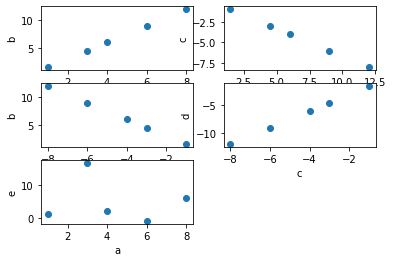

In [53]:
df = pd.DataFrame({
    'a':np.array([1,3,4,6,8]),
    'b':np.array([1,3,4,6,8])*1.5,
    'c':np.array([1,3,4,6,8])*-1,
    'd':np.array([1,3,4,6,8])*-1.5,
    'e':np.array([1,17,2,-1,6])
})
#POSITIVE COVARIANCE
plt.subplot(3,2,1)
plt.scatter(df['a'], df['b'])
plt.xlabel('a')
plt.ylabel('b')

print ('Between a and b : positive covariance ', np.cov(df['a'], df['b']))

corr = spearmanr(df['a'].values, df['b'].values)
print ('Between a and b : positive correlation ', corr)

#NEGATIVE COVARIANCE
plt.subplot(3,2,2)
plt.scatter(df['b'], df['c'])
plt.xlabel('b')
plt.ylabel('c')
print ('Between b and c : negative covariance ', np.cov(df['b'], df['c']))
corr, _ = spearmanr(df['b'], df['c'])
print ('Between c and b : positive correlation ', corr)

plt.subplot(3,2,3)
plt.scatter(df['c'], df['b'])
plt.xlabel('c')
plt.ylabel('b')
print ('Between c and b : negative covariance ', np.cov(df['c'], df['b']))
corr, _ = spearmanr(df['c'], df['b'])
print ('Between c and b : positive correlation ', corr)

plt.subplot(3,2,4)
plt.scatter(df['c'], df['d'])
plt.xlabel('c')
plt.ylabel('d')
print ('Between c and d : negative covariance ', np.cov(df['c'], df['d']))
corr, _ = spearmanr(df['c'], df['d'])
print ('Between c and d : positive correlation ', corr)

plt.subplot(3,2,5)
plt.scatter(df['a'].values, df['e'].values)
plt.xlabel('a')
plt.ylabel('e')
print ('Between a and e : no covariance ', np.cov(df['a'], df['e']))
corr, _ = spearmanr(df['a'], df['e'])
print ('Between a and e : no correlation ', corr)


# ASSIGNMENT CORRELATION

In [61]:
temp = np.array([14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2])
sales = np.array([215,325,185,332,406,522,412,614,544,421,445,408])
corr, _ = spearmanr(temp, sales)
icecream_sales = pd.DataFrame({'temperature':temp, 'sales':sales})
print ('correlation is ', icecream_sales['temperature'].corr(icecream_sales['sales']))
print ('correlation is \n', icecream_sales.corr(method='pearson'))
if corr>0.9:
    print ('strongly correlated and is positive in nature')
elif corr<-0.9:
    print ('strongly correlated and is nagative in nature')
    

correlation is  0.9575066230015952
correlation is 
              temperature     sales
temperature     1.000000  0.957507
sales           0.957507  1.000000
strongly correlated and is positive in nature


In [62]:
corr

0.9510489510489512

# ADDITIVE THEOREM OF PROBABILITY

In [63]:
#Assignment 1
#In a math class of 30 students, 17 are boys and 13 are girls. On a unit test, 4 boys and 5 girls made an A grade. 
#If a student is chosen at random from the class, what is the probability of choosing a girl or an A student?

In [64]:
Prob_Girl = 5/13
Prob_A_Grade = 9/30
#Mutually Non Exlusive as there is a possibility to get a girl with an A grade
combined_prob = Prob_Girl + Prob_A_Grade - (Prob_Girl*Prob_A_Grade)
combined_prob

0.5692307692307692

# HYPOTHESIS TESTING HANDS ON

Q. The average weights of students of my class is 168 lbs. A nutritionist believes that the
mean is different. She measured the weights of 36 students and found that the mean to be
169.5 lbs with a std of 3.9. AT 95% confidence, is there enough evidence to discard the null
hypothesis?

In [90]:
import pandas as pd
import statistics
from scipy import stats
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests

# GENERATE DATA with mean 169.5 and Standard Deviation 168
mu, sigma = 169.5, 3.9 # mean and standard deviation
# np.random.seed(50)
s = np.random.normal(mu, sigma, 36)
group_standardised = (s - s.mean()) / s.std()
# print(group_standardised.std(),group_standardised.mean())

desired_std = mu
desired_mean = sigma
group_scaled = group_standardised * desired_std + desired_mean
print(group_scaled.std(),group_scaled.mean())
print (group_scaled)
print (group_scaled.mean(), group_scaled.std())

ztest, pval = stests.ztest(x1 = group_scaled, value = 168, alternative='two-sided')
print (ztest, pval)

# t, pval_t = ttest_1samp(s, 168)
# print (t, pval_t)

169.49999999999997 3.900000000001033
[-9.85730977e+01  2.61414891e+02  3.22717357e+02  1.08185009e+02
 -3.81734780e+01 -6.47143036e+01 -2.24632415e-01 -9.63774552e+00
 -6.38961276e+01  1.62235684e+02 -8.56095781e+01  4.08325012e+01
  3.03744751e+02 -9.09232327e+01  5.37411340e+01 -3.80026480e+01
  1.08057498e+02 -3.66966106e+01 -2.55673448e+02 -5.94138593e+01
 -8.38064702e+01  1.99237735e+02  1.63031641e+01  5.23575298e+01
  5.51083477e+01  4.15651938e+01 -1.54624734e+02 -1.91426317e+02
 -1.81039286e+02 -1.12185951e+02 -2.09426829e+02  7.90743175e+01
  4.78246634e+02 -1.72566345e+01 -4.07760696e+02  5.66439332e+01]
3.900000000001033 169.49999999999997
-5.72760290505393 1.0185965099107702e-08


In [3]:
import pandas as pd
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests

# GENERATE DATA with mean 169.5 and Standard Deviation 168
mu, sigma = 0.001, 0.0025 # mean and standard deviation
np.random.seed(20)
s = np.random.normal(mu, sigma, 250)
print (s)
group_standardised = (s - s.mean()) / s.std()
# print(group_standardised.std(),group_standardised.mean())

desired_std = mu
desired_mean = sigma
group_scaled = group_standardised * desired_std + desired_mean


# print (s.mean(), s.std())

ztest, pval = stests.ztest(x1 = s, value = 0, alternative='two-sided')
print (ztest, pval)

[ 3.20973278e-03  1.48966256e-03  1.89384129e-03 -4.85815476e-03
 -1.71208147e-03  2.39924072e-03  3.34867337e-03 -1.44620261e-03
  2.25774210e-03  2.01603617e-03  1.80865252e-03 -2.33527205e-04
 -9.80041977e-04 -1.10591984e-03 -2.19875665e-03  1.61428792e-03
  8.89512998e-04  4.91908138e-03  3.62777170e-03  2.01592106e-03
  5.78384747e-04 -6.97425697e-03  3.80033065e-03  4.33194552e-03
  3.91653085e-04  6.74923222e-04  7.27456572e-04  4.89046610e-03
  1.32194588e-03 -4.16737181e-03 -1.21373289e-03 -1.76144871e-03
  3.33216587e-03  6.14959500e-03 -1.33734490e-03 -3.03247555e-03
  2.31767430e-03 -2.87775184e-03  1.82403335e-03 -1.84131635e-03
  1.53773489e-04  1.80242696e-03 -5.05770045e-04  4.86182090e-03
  2.61758521e-03  2.48304303e-03  2.09506124e-03  4.39447254e-03
  4.01127819e-03  4.37949047e-03  2.23359309e-03 -5.76091312e-03
 -3.87964492e-04  1.00377140e-03  3.14273454e-03  4.70285912e-03
  4.50847194e-04  4.75849539e-03 -2.70596263e-03 -1.14041055e-03
 -1.07173193e-03  1.28511

# ASSIGNMENT

In [25]:
'''Write a Python Function which takes the parameters required for Z/T test and then
returns, whether to reject or fail to reject null hypothesis. Use the questions
discussed in class to test your code.'''

def hypothesis_test(Hypothesis_Null, Alpha, Sample_Size, mu, sigma,tails, population_mean_available=False):
    if population_mean_available:
        sigma = sigma/(Sample_Size**0.5)
        print ('Sigma is ',sigma)
    s = np.random.normal(mu, sigma, Sample_Size)
    group_standardised = (s - s.mean()) / s.std()
    group_scaled = group_standardised * sigma + mu
    print(group_scaled.std(),group_scaled.mean())
    print (group_scaled)
    print (group_scaled.mean(), group_scaled.std())
    ztest, pval = stests.ztest(x1 = group_scaled, value = Hypothesis_Null, alternative=tails)
    print ('P VALUE IS ',pval,' z value is ',ztest)
    if pval < Alpha:
        return 0
    else:
        return 1
'''
A researcher has agreed upon a data on a daily return of portfolio of call option over a
recent 250 days period. The mean daily return has been 0.1% and the standard deviation of
daily return portfolio is 0.25%.
The researchers believe that mean daily portfolio return is not 0. Construct a hypothesis test
of researcher’s belief at 95% Confidence Interval
'''
Hypothesis_Null = 0
Alpha = 0.05
Sample_Size = 250
mu = 0.001
sigma = 0.0025
hypothesis_test_result = hypothesis_test(Hypothesis_Null, Alpha, Sample_Size, mu, sigma,'two-sided')
if hypothesis_test_result:
    print ('Accept Null Hypothesis')
else:
    print ('Reject Null Hypothesis')
    






0.0025 0.001
[ 2.06479019e-04  1.12226379e-03 -1.81740704e-03 -5.81270405e-03
  3.51274584e-03 -9.77689537e-05  5.18276848e-03 -6.16277908e-04
  2.66457462e-03  3.91479011e-03  1.64982577e-03  2.86815943e-03
 -4.39165845e-04  6.46225767e-04  1.27435556e-03 -2.09530927e-03
  1.45310039e-03  5.53106556e-04  3.60039829e-04  6.32945867e-03
 -1.52882495e-03  4.21444231e-03 -2.84585170e-03  1.20148971e-03
  3.07978760e-03 -5.12789139e-04  3.56988765e-04  2.62156543e-03
  4.74401058e-04 -4.46715934e-03 -2.87864687e-03  4.04570560e-03
  3.71819446e-03 -3.28438180e-05  3.85505876e-03  1.89249660e-03
 -3.45177369e-03  5.63512071e-04 -2.77187488e-03 -2.33059865e-03
 -7.30793285e-04 -2.74026929e-04 -2.27975092e-04 -6.61145777e-04
  2.14935703e-03 -3.26201294e-03  4.60340171e-03  2.17980355e-03
  2.80819996e-03  1.25111964e-03  1.12084784e-03  4.21243058e-04
  2.25170561e-03 -2.15064726e-03 -2.46728099e-03  3.39478652e-04
  1.85105136e-04  2.37937037e-03 -7.02518250e-04  3.81116422e-03
 -3.94851955

In [27]:
print ('>>>>>>>>>>>>>>>>PRINCIPALS CLAIM<<<<<<<<<<<<<<<')

'''
A principal at a school claims that the students in his school are above average in terms
of intelligence. A random sample of 30 students’ IQ scores have a mean of 112.5. The mean
population IQ is 100 with STD of 15. Test the hypothesis of principal’s claim.
'''
Hypothesis_Null = 100
Alpha = 0.05
Sample_Size = 30
mu = 112.5
sigma = 15
hypothesis_test_result = hypothesis_test(Hypothesis_Null, Alpha, Sample_Size, mu, sigma,'larger', False)
if hypothesis_test_result:
    print ('Accept Null Hypothesis')
else:
    print ('Reject Null Hypothesis')

>>>>>>>>>>>>>>>>PRINCIPALS CLAIM<<<<<<<<<<<<<<<
15.000000000000002 112.49999999999999
[125.51717906 110.45052632 117.45807183 110.7284101  114.92113138
 123.57646119 107.09131178 108.04314225  94.01027649 129.67777001
  97.61075024 102.09698811 123.63121979 124.84398923 118.60420873
  92.66683619 104.89618433 129.86095748 104.24158892 132.42961919
 105.46725042 124.47043879  66.10693823 102.69141888 106.19607373
 105.48740949 136.1070659   98.92851157 122.15643757 135.03183279]
112.49999999999999 15.000000000000002
P VALUE IS  3.6008692878552295e-06  z value is  4.487637339278748
Reject Null Hypothesis


In [29]:
'''
The average weights of students of my class is 168 lbs. A nutritionist believes that the
mean is different. She measured the weights of 36 students and found that the mean to be
169.5 lbs with a std of 3.9. AT 95% confidence, is there enough evidence to discard the null
hypothesis?
'''

Hypothesis_Null = 168
Alpha = 0.05
Sample_Size = 36
mu = 169.5
sigma = 3.9
hypothesis_test_result = hypothesis_test(Hypothesis_Null, Alpha, Sample_Size, mu, sigma,'two-sided', False)
if hypothesis_test_result:
    print ('Accept Null Hypothesis')
else:
    print ('Reject Null Hypothesis')


3.8999999999999995 169.49999999999997
[162.2390193  168.87847785 172.06594581 173.2926967  164.04615653
 169.99724103 166.9282151  173.56204425 169.77094069 173.93619832
 169.93609395 170.95386128 171.90266432 177.54881255 162.95895928
 167.57341217 172.01170331 174.9918554  164.43674407 170.48121686
 167.6674255  163.47303831 166.8960826  165.27856666 172.72304934
 171.75158248 169.58195959 169.95262251 159.81789721 170.78206609
 175.39056125 170.58032312 170.12848538 172.01893083 169.4453416
 168.99980876]
169.49999999999997 3.8999999999999995
P VALUE IS  0.022881028338973434  z value is  2.275415301192117
Reject Null Hypothesis


In [59]:
'''Write a Python code to return matrix multiplication result (Also implement the
exception handling – should throw an error if the size is not perfect).
Remember the Matrix Multiplication size requirement. (m x n, n x p)'''

a = np.array([1,2,3,4,5,6,7,8,9]).reshape(9,-1)
b = np.array([1,1,1,1,1,1,1,1,1]).reshape(1,-1)
prod_mat= []

def mat_mul(mat1, mat2):
    
    try:
        assert(mat1.shape[1] == mat2.shape[0])
        for row in mat1:
            for col in mat2.T:
                prod_mat.append(sum([(x*y) for x,y in zip(row,col)]))
        return (np.array(prod_mat).reshape(mat1.shape[0],mat2.shape[1]))
    except AssertionError as err:
         print ('Please check the shapes of the input matrices')
print (mat_mul(a,b))
# for val in a:
#     print ('<<>>')
#     print (val)

[[1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9]]


# ANALYSIS OF WINE DATA

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
wine_data = pd.read_csv('wine.data',header=None,names=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])

In [17]:
wine_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
wine_data_sliced = wine_data[['Ash','Alcohol','Hue']]
corr_mat = np.corrcoef(wine_data_sliced[['Ash','Alcohol','Hue']],rowvar=False)

In [21]:
cov_mat

array([[ 1.        ,  0.2115446 , -0.07466689],
       [ 0.2115446 ,  1.        , -0.0717472 ],
       [-0.07466689, -0.0717472 ,  1.        ]])

<AxesSubplot:>

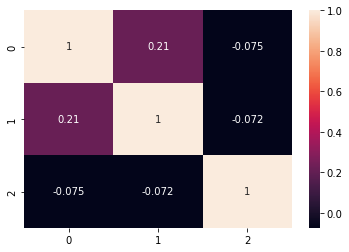

In [22]:
sns.heatmap(cov_mat,annot=True)

# NEWZEALAND GOVERNMENT DATA

In [23]:
injury_data = pd.read_csv("D:\learnbay\statistics_git\stats_code\dataset\serious-injury-outcome-indicators-2000-2020-CSV.csv")

In [24]:
injury_data.describe()

,Data_value,Lower_CI,Upper_CI
count,2748.000000,2748.000000,2748.000000
mean,490.517951,464.676049,516.359854
std,1407.607086,1375.839232,1439.777285
min,0.713333,0.191677,0.801232
25%,15.380863,13.279127,17.368272
50%,63.000000,50.923845,72.926641
75%,308.000000,273.602772,342.397228
max,14141.000000,13907.929047,14374.070953


In [25]:
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  2748 non-null   object 
 1   Period            2748 non-null   object 
 2   Type              2748 non-null   object 
 3   Data_value        2748 non-null   float64
 4   Lower_CI          2748 non-null   float64
 5   Upper_CI          2748 non-null   float64
 6   Units             2748 non-null   object 
 7   Indicator         2748 non-null   object 
 8   Cause             2748 non-null   object 
 9   Validation        2748 non-null   object 
 10  Population        2748 non-null   object 
 11  Age               2748 non-null   object 
 12  Severity          2748 non-null   object 
dtypes: float64(3), object(10)
memory usage: 279.2+ KB


In [26]:
injury_data.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


<AxesSubplot:>

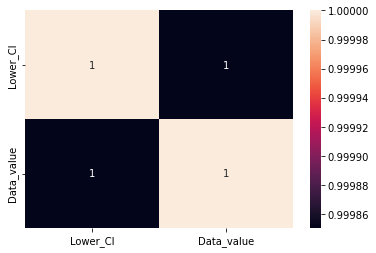

In [29]:
sns.heatmap(injury_data[['Lower_CI','Units','Data_value']].corr(),annot=True)

# DEATHS IN 2020 IN USA 

In [30]:
deaths_data = pd.read_csv("D:\learnbay\statistics_git\stats_code\dataset\AH_Provisional_Diabetes_Death_Counts_for_2020.csv")

In [31]:
deaths_data

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
0,10/20/2020,2020,1,<18 years,Female (F),0,3,5,0,0,0,0,0,0,0,0
1,10/20/2020,2020,1,<18 years,Male (M),0,3,3,0,0,0,0,0,0,0,0
2,10/20/2020,2020,1,18-29 years,Female (F),0,20,36,0,0,0,0,0,0,0,0
3,10/20/2020,2020,1,18-29 years,Male (M),0,44,65,0,0,0,0,0,0,0,0
4,10/20/2020,2020,1,30-39 years,Female (F),0,53,104,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,10/20/2020,2020,9,75-84 years,Male (M),2525,956,3925,385,434,1182,1182,276,292,7,52
222,10/20/2020,2020,9,80+ years,Female (F),3847,1201,4809,426,785,1785,1785,318,255,7,31
223,10/20/2020,2020,9,80+ years,Male (M),3277,1053,4387,394,580,1590,1590,340,331,6,16
224,10/20/2020,2020,9,85+ years,Female (F),2778,806,3204,270,578,1295,1295,209,179,3,16


<AxesSubplot:>

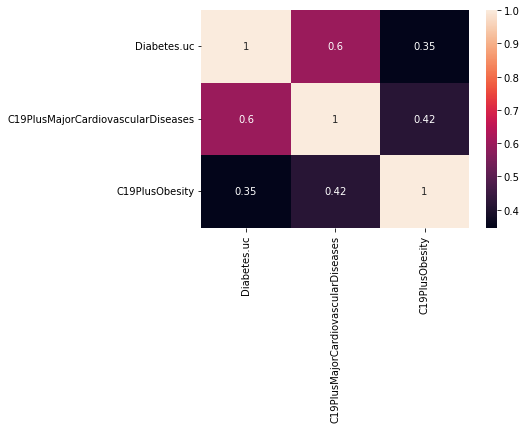

In [32]:
sns.heatmap(deaths_data[['Diabetes.uc','C19PlusMajorCardiovascularDiseases','C19PlusObesity']].corr(),annot=True)